## Predicción de Ventas a partir del Gasto en Publicidad utilizando Modelos de Regresión Lineal



### Descripción del Proyecto
Este proyecto utiliza modelos de machine learning para analizar y predecir las ventas de un producto en función del gasto en publicidad en tres medios principales: TV, Radio y Periódico. Se implementaron técnicas de regresión lineal simple y regresión lineal múltiple para evaluar cómo cada canal de publicidad, individualmente y en combinación, influye en las ventas.

Para el análisis y preparación de los datos, se utilizaron herramientas como Pandas y NumPy para la limpieza y manipulación de datos. Además, se aplicaron técnicas de visualización de datos con Matplotlib y Seaborn para identificar patrones y relaciones en el dataset.

En la fase de modelado, se empleó la biblioteca de machine learning Scikit-Learn para entrenar y evaluar los modelos, optimizando su rendimiento para obtener predicciones precisas.

### 1. Importar librerías y data set

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importar data set CSV

In [305]:
data = pd.read_csv("C:/Users/Dilson/Desktop/Advertising.csv")

### 3. Exploración general de los datos

In [347]:
data.head()  ## Ver primeras cinco filas del data set

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Correlacion de las variables 

La correlación es una medida estadística que indica la relación y la fuerza de asociación entre dos variables.
 1: Correlación positiva perfecta. Las variables se relacionan de manera directa y proporcional.
 0: No existe relación lineal entre las variables.
-1: Correlación negativa perfecta. Las variables se relacionan inversamente de manera proporcional.



In [349]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000



Se observa que TV tiene una correlación más cercana a Sales, seguido de el Radio, y de final Newspaper 

#### Gráficas de correlaciones

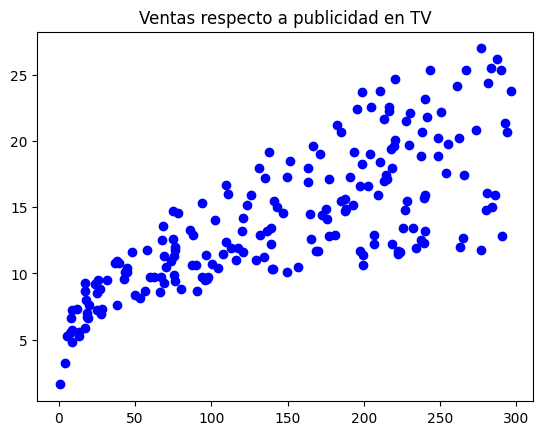

In [386]:
#Correlación de TV y Sales
plt.plot(data["TV"], data ["Sales"], "bo")  #"bo" hace el gráfico con puntos de color azul
plt.title ("Ventas respecto a publicidad en TV")
plt.show()

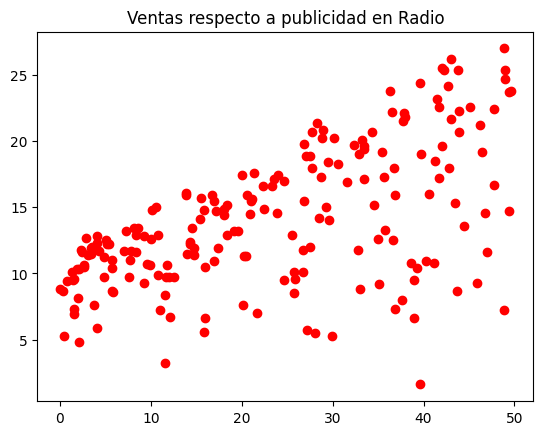

In [ ]:
#Correlación de Radio y Sales
plt.plot(data["Radio"], data ["Sales"], "ro") #"ro" hace el gráfico con puntos de color rojo
plt.title ("Ventas respecto a publicidad en Radio")
plt.show()

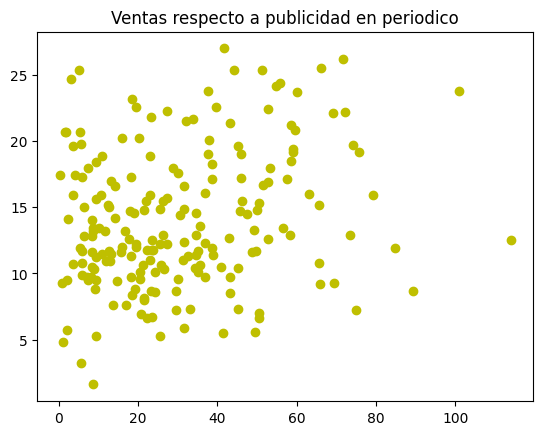

In [ ]:
#Correlación de Newspaper y Sales
plt.plot(data["Newspaper"], data ["Sales"], "yo") #"yo" hace el gráfico con puntos de color amarillo
plt.title ("Ventas respecto a publicidad en periodico")
plt.show()

### 4. Modelado

In [683]:
##Importar librería
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Variable independiente TV

 Es necesario transformar los datos en un formato 2D,  con reshape(-1, 1), si se está utilizando un modelo de regresión lineal, ya que estos modelos esperan que las entradas (características) sean proporcionadas en formato de matriz 2D. Aunque solo tengas una sola característica (por ejemplo, la columna TV), el modelo necesita que la entrada sea una matriz bidimensional.

In [684]:
data_tv = data ["TV"] # Guardar en variable la columna TV
data_tv = data_tv.values.reshape (-1,1)  #se utiliza para cambiar la forma (dimensiones) de un arreglo sin alterar sus datos.
data_tv

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

#### Variable dependiente

In [685]:
y = data["Sales"].values # Solo selecciono los valores de la columna "Sales" que es mi variable dependiente

#### Dividir conjunto entre entrenamiento y testing

Dividir el conjunto de datos en conjuntos de entrenamiento y conjuntos de prueba. Este paso es fundamental en los modelos de machine learning para evaluar el rendimiento del modelo de manera objetiva. 

In [686]:
X_train, X_test, Y_train, Y_test =  train_test_split (data_tv, y, test_size = 0.3, random_state=42) # Divide mis datos 30% para entrenar modelo y 70% para test

#### Crear regresión

In [687]:
reg = LinearRegression() # Clase de scikit-learn que implementa el algoritmo de regresión lineal ordinaria
reg.fit(X_train,Y_train) #Método utilizado para entrenar el modelo tomando como parametro la matriz de variables independientes y la variable dependiente

LinearRegression()

### 5. Evaluación de Modelos

Predecicción de nuestro modelo

In [688]:
y_pred = reg.predict(X_test) # Genera las predicciones de la variable dependiente, X_test Es la matriz que contiene los nuevos datos (o datos de prueba) para los que queremos predecir el valor de salida.

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], Y_test[:4])) #Los corchetes {} son marcadores de posición que serán reemplazados por los valores proporcionados en el método format().

# y_pred[:4], Y_test[:4]  Es una operación de slicing (corte) que selecciona las primeras cuatro predicciones del array

Predicciones: [14.81785392 16.30754437 20.83230507  7.78243112], Valores Actuales: [16.9 22.4 21.4  7.3]


Nuestro modelo de predicción no se acerca mucho a nuestos valores reales actuales

### Conocer funcionamiento general del modelo

R-Square (Coeficiente de Determinación)

El R-squared (R²) es una medida que indica qué tan bien el modelo de regresión se ajusta a los datos. Representa la proporción de la varianza en la variable dependiente que es explicada por las variables independientes en el modelo. 

R² = 1: El modelo explica el 100% de la variabilidad de los datos.

R² = 0: El modelo no explica ninguna variabilidad.

Valores negativos: Indican que el modelo se comporta peor que un modelo de referencia simple, como predecir siempre el valor medio de los datos.

In [689]:
r_squared = reg.score(X_test,Y_test)

print(r_squared )

0.6714477229302764


#### RMSE (Root Mean Squared Error)

El RMSE (Root Mean Squared Error) es una medida que indica la magnitud promedio del error de las predicciones. Es la raíz cuadrada del Error Cuadrático Medio (MSE), lo que significa que penaliza más los errores grandes.

Un RMSE bajo indica un modelo con buenas predicciones, ya que los errores son pequeños.
Un RMSE alto indica que el modelo está cometiendo errores grandes y puede no estar ajustando bien los datos.

In [690]:
rmse = mean_squared_error (Y_test, y_pred)

print(rmse)  

8.970991242413614


#### Crear un data frame para visualizar predicciones

In [691]:
# Este código crea un DataFrame con las columnas TV, RealSales, y PredSales, donde  de compara las ventas reales con las predicciones del modelo.

sales_comp = pd.DataFrame(
    { "TV" : X_test.flatten(), 
    "RealSales": Y_test.flatten(),
     "PredSales": y_pred.flatten()  
    })

sales_comp.head()

,TV,RealSales,PredSales
0,163.3,16.9,14.817854
1,195.4,22.4,16.307544
2,292.9,21.4,20.832305
3,11.7,7.3,7.782431
4,220.3,24.7,17.463099


#### Crear un gráfico para visualizar predicciones

<function matplotlib.pyplot.show(close=None, block=None)>

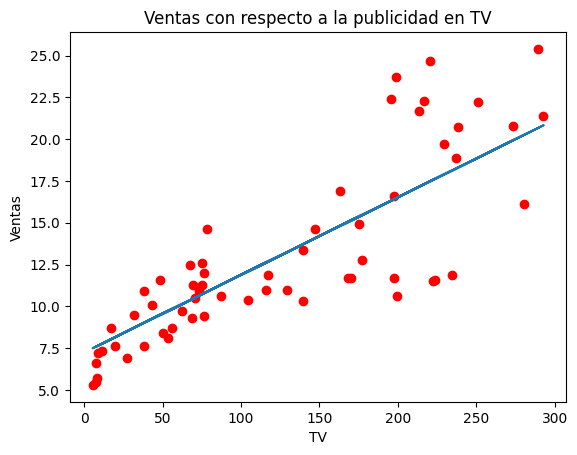

In [692]:
plt.plot (sales_comp ["TV"], sales_comp ["RealSales"], "ro") # Grafica los valores de "TV" en el eje X y las ventas reales ("RealSales") en el eje Y, usando puntos rojos
plt.plot (sales_comp ["TV"], sales_comp ["PredSales"]) #  Este comando grafica las predicciones de ventas ("PredSales") en función de los valores de "TV", usando una línea por defecto.
plt.title("Ventas con respecto a la publicidad en TV")
plt.xlabel("TV")
plt.ylabel("Ventas")
plt.show

#### Variable independiente Radio

In [693]:
data_Radio = data ["Radio"] # Guardar en variable la columna Radio
data_Radio = data_Radio.values.reshape (-1,1) #se utiliza para cambiar la forma (dimensiones) de un arreglo sin alterar sus datos.
data_Radio




array([[37.8],
       [39.3],
       [45.9],
       [41.3],
       [10.8],
       [48.9],
       [32.8],
       [19.6],
       [ 2.1],
       [ 2.6],
       [ 5.8],
       [24. ],
       [35.1],
       [ 7.6],
       [32.9],
       [47.7],
       [36.6],
       [39.6],
       [20.5],
       [23.9],
       [27.7],
       [ 5.1],
       [15.9],
       [16.9],
       [12.6],
       [ 3.5],
       [29.3],
       [16.7],
       [27.1],
       [16. ],
       [28.3],
       [17.4],
       [ 1.5],
       [20. ],
       [ 1.4],
       [ 4.1],
       [43.8],
       [49.4],
       [26.7],
       [37.7],
       [22.3],
       [33.4],
       [27.7],
       [ 8.4],
       [25.7],
       [22.5],
       [ 9.9],
       [41.5],
       [15.8],
       [11.7],
       [ 3.1],
       [ 9.6],
       [41.7],
       [46.2],
       [28.8],
       [49.4],
       [28.1],
       [19.2],
       [49.6],
       [29.5],
       [ 2. ],
       [42.7],
       [15.5],
       [29.6],
       [42.8],
       [ 9.3],
       [24

In [694]:
y = data["Sales"].values  ## Solo selecciono los valores de la columna "Sales" que es mi variable dependiente

#### Dividir conjunto entre entrenamiento y testing

In [695]:
X_train, X_test, Y_train, Y_test =  train_test_split (data_Radio, y, test_size =0.3, random_state=42)

#### Crear regresión, entrenar el modelo y hacer predicciones

In [696]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], Y_test[:4]))

Predicciones: [16.26772205 19.79791711 15.5441417  17.42983596], Valores Actuales: [16.9 22.4 21.4  7.3]


####  R-Square (Coeficiente de Determinación)

In [697]:
r_squared = reg.score(X_test,Y_test)

print(r_squared )

0.13116693684196756


#### RMSE (Root Mean Squared Error)

In [698]:
rmse = mean_squared_error (Y_test, y_pred)

print(rmse )  

23.723146496580338


#### Crear un data frame para visualizar predicciones

In [699]:
sales_comp = pd.DataFrame(
    { "Radio" : X_test.flatten(),
    "RealSales": Y_test.flatten(),
     "PredSales": y_pred.flatten() 
        
    })

sales_comp.head()

,Radio,RealSales,PredSales
0,31.6,16.9,16.267722
1,47.7,22.4,19.797917
2,28.3,21.4,15.544142
3,36.9,7.3,17.429836
4,49.0,24.7,20.082964


#### Crear un gráfico para visualizar predicciones en Radio

<function matplotlib.pyplot.show(close=None, block=None)>

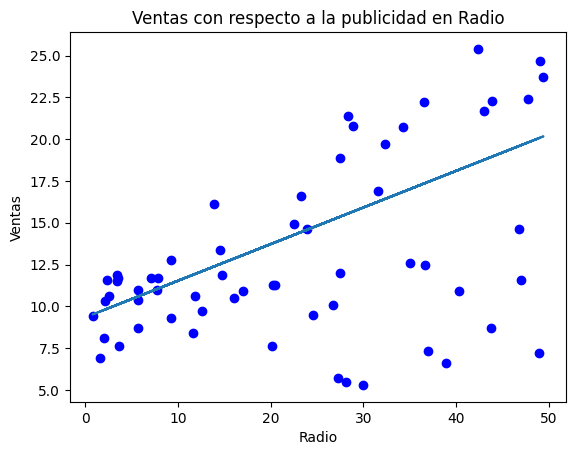

In [700]:
plt.plot (sales_comp ["Radio"], sales_comp ["RealSales"], "bo")
plt.plot (sales_comp ["Radio"], sales_comp ["PredSales"])
plt.title("Ventas con respecto a la publicidad en Radio")
plt.xlabel("Radio")
plt.ylabel("Ventas")
plt.show

#### Variable independiente Newspaper

In [745]:
data_Newspaper = data ["Newspaper"]
data_Newspaper = data_Newspaper.values.reshape (-1,1)
data_Newspaper

array([[ 69.2],
       [ 45.1],
       [ 69.3],
       [ 58.5],
       [ 58.4],
       [ 75. ],
       [ 23.5],
       [ 11.6],
       [  1. ],
       [ 21.2],
       [ 24.2],
       [  4. ],
       [ 65.9],
       [  7.2],
       [ 46. ],
       [ 52.9],
       [114. ],
       [ 55.8],
       [ 18.3],
       [ 19.1],
       [ 53.4],
       [ 23.5],
       [ 49.6],
       [ 26.2],
       [ 18.3],
       [ 19.5],
       [ 12.6],
       [ 22.9],
       [ 22.9],
       [ 40.8],
       [ 43.2],
       [ 38.6],
       [ 30. ],
       [  0.3],
       [  7.4],
       [  8.5],
       [  5. ],
       [ 45.7],
       [ 35.1],
       [ 32. ],
       [ 31.6],
       [ 38.7],
       [  1.8],
       [ 26.4],
       [ 43.3],
       [ 31.5],
       [ 35.7],
       [ 18.5],
       [ 49.9],
       [ 36.8],
       [ 34.6],
       [  3.6],
       [ 39.6],
       [ 58.7],
       [ 15.9],
       [ 60. ],
       [ 41.4],
       [ 16.6],
       [ 37.7],
       [  9.3],
       [ 21.4],
       [ 54.7],
       [

In [746]:
y = data["Sales"].values ## Solo selecciono los valores de la columna "Sales"

#### Dividir conjunto entre entrenamiento y testing

In [747]:
X_train, X_test, Y_train, Y_test =  train_test_split (data_Newspaper, y, test_size =0.3, random_state=42)

#### Crear regresión, entrenar el modelo y hacer predicciones

In [748]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], Y_test[:4]))

Predicciones: [15.86524548 15.86524548 15.27418406 15.39605239], Valores Actuales: [16.9 22.4 21.4  7.3]


####  R-Square (Coeficiente de Determinación)

In [749]:
r_squared = reg.score(X_test,Y_test)

print(r_squared )

-0.057301173788661064


#### RMSE (Root Mean Squared Error) 

In [750]:
rmse = mean_squared_error (Y_test, y_pred)

print(rmse )  

28.869194440672988


#### Crear un data frame para visualizar predicciones

In [751]:
sales_comp = pd.DataFrame(
    { "Newspaper" : X_test.flatten(),
    "RealSales": Y_test.flatten(),
     "PredSales": y_pred.flatten() 
        
    })

sales_comp.head()

,Newspaper,RealSales,PredSales
0,52.9,16.9,15.865245
1,52.9,22.4,15.865245
2,43.2,21.4,15.274184
3,45.2,7.3,15.396052
4,3.2,24.7,12.836817


#### Crear un gráfico para visualizar predicciones en Periódico

<function matplotlib.pyplot.show(close=None, block=None)>

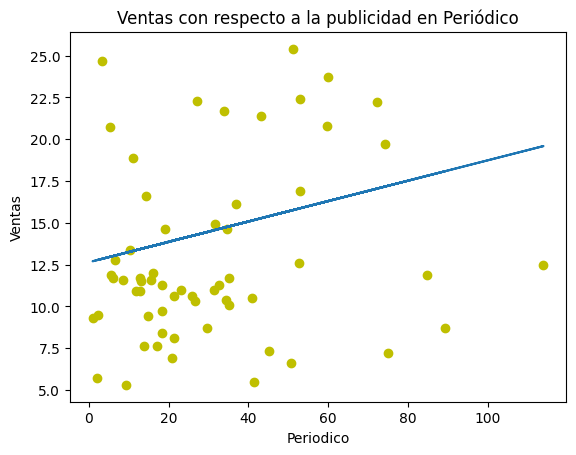

In [752]:
plt.plot (sales_comp ["Newspaper"], sales_comp ["RealSales"], "yo")
plt.plot (sales_comp ["Newspaper"], sales_comp ["PredSales"])
plt.title("Ventas con respecto a la publicidad en Periódico")
plt.xlabel("Periodico")
plt.ylabel("Ventas")
plt.show

### Regresión lineal múltiple

### Periódico y tv

In [753]:
x = data.drop (["Radio","Sales"], axis=1).values  # Eliminar columnas  "Radio","Sales" y se almacenanen x

y = data["Sales"].values # Solo selecciono los valores de la columna "Sales" y las guardo en  variable y

X_train, X_test, Y_train, Y_test =  train_test_split (x, y, test_size =0.3, random_state=42) # Dividir conjunto entre entrenamiento y testing

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train,Y_train)

# Hacer preddciones

y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], Y_test[:4]))

Predicciones: [16.04429782 17.51962128 21.46954703  8.65505487], Valores Actuales: [16.9 22.4 21.4  7.3]


In [754]:
#R-Square (Coeficiente de Determinación)
r_squared = reg.score(X_test,Y_test)

print(r_squared )

0.668935545006016


In [755]:
# RMSE (Root Mean Squared Error) 
rmse = mean_squared_error (Y_test, y_pred)

print(rmse )  

9.039585276699192


In [756]:
# Crear data frame donde se guardan las dos variables independientes

sales_comp = pd.DataFrame(
    { "TV" : X_test[:, 0].flatten(),
     "Newspaper" : X_test[:, 1].flatten(),
    "RealSales": Y_test.flatten(),
     "PredSales": y_pred.flatten() 
        
    })

sales_comp.head()

,TV,Newspaper,RealSales,PredSales
0,163.3,52.9,16.9,16.044298
1,195.4,52.9,22.4,17.519621
2,292.9,43.2,21.4,21.469547
3,11.7,45.2,7.3,8.655055
4,220.3,3.2,24.7,15.942332


<Axes: xlabel='RealSales', ylabel='PredSales'>

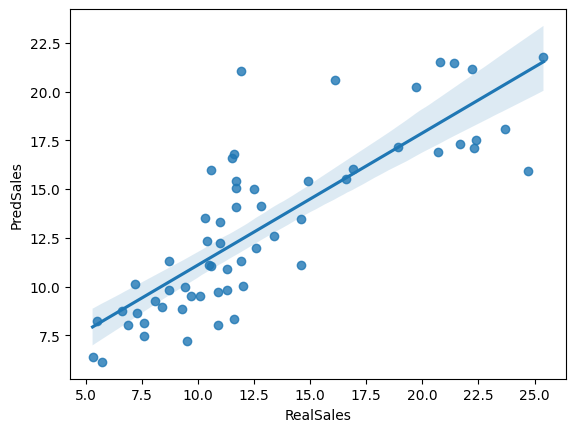

In [ ]:
# Generar gráfico de regresión entre los valores reales y los que se predicen
sns.regplot (x = sales_comp["RealSales"],y = sales_comp["PredSales"] )

### TV y Radio

In [762]:
x = data.drop (["Newspaper","Sales"], axis=1).values # Eliminar columnas  "Newspaper","Sales" y se almacenanen x

y = data["Sales"].values # Solo selecciono los valores de la columna "Sales" y las guardo en  variable y

X_train, X_test, Y_train, Y_test =  train_test_split (x, y, test_size =0.3, random_state=42) # Dividir conjunto entre entrenamiento y testing

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train,Y_train)

# Hacer preddciones
y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], Y_test[:4]))



Predicciones: [16.43778963 21.11462413 21.48161733 10.82947123], Valores Actuales: [16.9 22.4 21.4  7.3]


In [763]:
#R-Square (Coeficiente de Determinación)
r_squared = reg.score(X_test,Y_test)

print(r_squared )

0.8656253548947075


In [764]:
# Crear data frame donde se guardan las dos variables independientes
sales_comp = pd.DataFrame(
    { "TV" : X_test[:, 0].flatten(),
     "Radio" : X_test[:, 1].flatten(),
    "RealSales": Y_test.flatten(),
     "PredSales": y_pred.flatten() 
        
    })

sales_comp.head()

,TV,Radio,RealSales,PredSales
0,163.3,31.6,16.9,16.437790
1,195.4,47.7,22.4,21.114624
2,292.9,28.3,21.4,21.481617
3,11.7,36.9,7.3,10.829471
4,220.3,49.0,24.7,22.475538


## Conclusiones

### TV y Radio son las variables más significativas: Esto implica que el gasto en publicidad en TV y radio tiene un mayor impacto en las ventas en comparación con otras variables como el gasto en periódicos.

###  Se afirma que las campañas publicitarias en TV y radio son estrategias efectivas para aumentar las ventas. Las empresas deberían priorizar estas plataformas si buscan maximizar su retorno de inversión en publicidad.